In [1]:
import requests
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import _thread
import time
import jieba
from wordcloud import WordCloud

In [2]:
Cupoy_url = "https://www.cupoy.com/newsfeed/topstory" 

urlList = ['https://www.cupoy.com/newsfeed/topicgrp/tech_tw',
           'https://www.cupoy.com/newsfeed/topicgrp/business_tw',
           'https://www.cupoy.com/newsfeed/topicgrp/life_tw',
           'https://www.cupoy.com/newsfeed/topicgrp/Game_tw',
           'https://www.cupoy.com/newsfeed/topicgrp/Sports_tw',
           'https://www.cupoy.com/newsfeed/topicgrp/design_tw',
           'https://www.cupoy.com/newsfeed/topicgrp/Reading_tw',
           'https://www.cupoy.com/newsfeed/topicgrp/3CExpert_tw',
           'https://www.cupoy.com/newsfeed/topicgrp/GamePlayer_tw',
           'https://www.cupoy.com/newsfeed/topicgrp/Babyhome_tw',
           'https://www.cupoy.com/newsfeed/topicgrp/Hipster_tw',
           'https://www.cupoy.com/newsfeed/topicgrp/Fitness_tw',
           'https://www.cupoy.com/newsfeed/topicgrp/WhiteCollar_tw',
           'https://www.cupoy.com/newsfeed/topicgrp/InternationalFinance_tw',
           'https://www.cupoy.com/newsfeed/topicgrp/Hedonism_tw',
           'https://www.cupoy.com/newsfeed/topicgrp/CityTour_tw']

setList = [set() for _ in range(16)]
#紀錄所有類別的名稱
namedict = { 0:'tech_科技', 1:'business_商業', 2:'life_生活', 3:'Game_遊戲', 4:'Sports_運動', 5:'design_設計',
             6:'Reading_閱讀', 7:'3CExpert_3C達人', 8:'GamePlayer_御宅學園', 9:'Babyhome_親子家庭', 10:'Hipster_文青聚落',
             11:'Fitness_健身瘦身', 12:'WhiteCollar_職場白領', 13:'InternationalFinance_國際財經',
             14:'Hedonism_享樂女性', 15:'CityTour_城市時旅'}

#紀錄文章在各類別中出現次數
staticdict = {'tech':0, 'business':0, 'life':0, 'Game':0, 'Sports':0, 'design':0,
             'Reading':0, '3CExpert':0, 'GamePlayer':0, 'Babyhome':0, 'Hipster':0,
             'Fitness':0, 'WhiteCollar':0, 'InternationalFinance':0,
             'Hedonism':0, 'CityTour':0, 'other':0}

In [4]:
#抓取各類別中有哪些子類別之函式
def Threadautofetch(url, Set):
    
    chrome_options = Options()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--disable-gpu')
    thread_driver = webdriver.Chrome(chrome_options=chrome_options)
    thread_driver.get(url)

    for i in range(100):
        print("網頁更新中...")
        thread_driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(5)
    
        html = thread_driver.page_source
        soup = BeautifulSoup(html, "lxml")

        for tmp in soup.find_all('div', class_ = 'sc-eEieub sc-iuDHTM ibJqYc'):
            category = tmp.find('div', class_ = 'sc-gacfCG bPSpUf').text
            Set.add(category)
    thread_driver.close()
    
#切title之函式(期許可以找出文章原始出處，如機器之心等)
def cut_title(t):
    if '|' in t:
        return t.rsplit('|', 1)
    elif '｜' in t:
        return t.rsplit('｜', 1)
    elif '┃' in t:
        return t.rsplit('┃', 1)
    elif '-' in t:
        return t.rsplit('-', 1)
    else:
        return [t, 'None']

In [5]:
#開始提取各類別中之子類別(採用mutli-thread)
for i, url in enumerate(urlList):
    _thread.start_new_thread( Threadautofetch, (url, setList[i]) )
    time.sleep(2) #設太小可能會不成功

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網

網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網

In [6]:
#印出各類別中可能具有之所有子類別
for i in range(len(setList)):
    name = namedict[i].split('_')[1]
    print(name, ": ")
    print(setList[i], '\n')

科技 : 
{'社交媒體', '相機', '虛擬實境', '美食', '美妝保養', '蘋果專區', '無人駕駛', '3C產品', '資訊安全', 'APP應用程式', 'Fintech金融科技', '電子商務', '遊戲情報', 'Google專區', '網紅經濟與自媒體', 'AI與大數據', '物聯網', '區塊鏈技術', '手機平板', '醫療健康', '職涯', '筆電', '理財', '創業'} 

商業 : 
{'社交媒體', '相機', '平面設計', '足球', '汽車', '美食', '美妝保養', '趨勢與策略', '3C產品', '共享經濟', '資訊安全', 'Fintech金融科技', '行銷', '電子商務', '好文共賞', '遊戲情報', '財經', '籃球', '網紅經濟與自媒體', '旅遊', '兩岸', '國際', '區塊鏈技術', '職涯', '理財', '創業', '群眾募資', '房地產'} 

生活 : 
{'相機', '汽車', '美食', '無人駕駛', '健身', '資訊安全', '攝影', '電影', '財經', '育兒', '旅遊', '兩岸', '兩性', '戶外路跑', '醫療健康', '影劇', '理財', '美妝保養', '房地產'} 

遊戲 : 
{'電競', '棒球', '遊戲情報', '3C產品'} 

運動 : 
{'排球', '戶外路跑', '健身', '足球', '高爾夫', '籃球', '羽球', '棒球', '網球', '美食', '桌球'} 

設計 : 
{'3C產品', '平面設計', '生活空間', 'UIUX 設計', '產品設計', '醫療健康', '旅遊', '職涯', '影劇', '行銷', '美食', '蘋果專區'} 

閱讀 : 
{'棒球', '好文共賞', '理財', '遊戲情報'} 

3C達人 : 
{'相機', '美食', '蘋果專區', '趨勢與策略', '3C產品', '健身', 'APP應用程式', 'Fintech金融科技', '電子商務', '遊戲情報', '行銷', 'Google專區', '財經', '網紅經濟與自媒體', '區塊鏈技術', '手機平板', '職涯', '筆電', '理財'} 

御宅學園 : 
{'電影', '電競', 

In [7]:
#進行抓取熱門前500文章

browser = webdriver.Chrome()
browser.get(Cupoy_url)  

SCROLL_PAUSE_TIME = 1

#using list to keep the title of the article
titleList = []

flag = 1

last_height = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
while True:
    print("網頁更新中...")
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(5)
    
    html = browser.page_source
    soup = BeautifulSoup(html, "lxml")

    for tmp in soup.find_all('div', class_ = 'sc-eEieub sc-iuDHTM ibJqYc'):
        if len(titleList) < 500:
            link = tmp.find('a')['href']
            category = tmp.find('div', class_ = 'sc-gacfCG bPSpUf').text
            titleRaw =  tmp.find('h6', class_ = 'sc-erNlkL sc-ekulBa hDLssh').text
            title, ref = cut_title(titleRaw) #把標題跟來源切割，以便接下來做整理
            ref = ref[1:] if ref[0] == ' ' else ref #某些來源可能會有一個空白在前面，因此將此無意義的空白去除
            if len(titleList) == 0 or title not in np.array(titleList)[...,0]:
                titleList.append([title, ref, category, link])
        else:
            flag = 0
            break
            
    if not flag:
        break

網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網

In [8]:
#轉成dataframe
df = pd.DataFrame(titleList, columns=['title', 'source', 'category', 'link'])
df 

,title,source,category,link
0,蓮花電動超級跑車工廠完工，今年夏天將交付第一輛 Evija,TechNews 科技新報,科技,https://technews.tw/2020/02/20/lotus-evija-fac...
1,網路流量愈來愈便宜，免費的 Wi-Fi 計畫也就沒必要了,TechNews 科技新報,科技,https://technews.tw/2020/02/20/google-ends-its...
2,戳破低碳神話，數位科技是巨大環境污染源,TechNews 科技新報,科技,https://technews.tw/2020/02/20/digital-life-ma...
3,就像學游泳前先「不怕水」！找到學習關鍵捷徑，利用3大驅動力加速成長,SmartM 新網路科技,SmartM,https://www.smartm.com.tw/Article/36323934cea3
4,沒有標準答案怎麼算分？從一張法國初中講義看懂歐洲人文教育精神,BuzzOrange,BuzzOrange 報橘,https://buzzorange.com/2016/10/24/europe-human...
...,...,...,...,...
495,「專訪」鑽進書牆中的小樂園！臺北 30 坪純淨灰感親子宅 - 六相設計,DECOmyplace 裝潢裝修、室內設計、居家佈置第一站,生活空間,https://decomyplace.com/newspost.php?id=7486
496,醫生、藝術治療師都來念的研究所 華德福教育在臺灣有多紅？,天下雜誌,天下雜誌－投資理財,https://cwapp.app.link/QXiMpq4rc4
497,《美股》盼陸振興經濟、Fed樂觀 費半、NASDAQ歷史新高 – MoneyDJ新聞摘錄,None,MoneyDJ理財網,http://sc.piee.pw/NSMVQ
498,日圓匯率再跳水創1年多新低 換5萬臺幣多賺2張迪士尼門票,Yahoo奇摩理財,Yahoo奇摩理財,http://user74046.psee.io/Q7SVB


In [9]:
#將子類別統整至大類別當中
cateList = []
for data in df['category']:
    tmp = []
    flag = False
    for i, iset in enumerate(setList):
        if data in iset:
            firstname, secondname = namedict[i].split('_')
            staticdict[firstname] += 1
            tmp.append(secondname)
            flag = True
    if not flag:
        tmp.append('other')
        staticdict['other'] += 1
    cateList.append(tmp)

In [10]:
df['total_category'] = cateList
df

,title,source,category,link,total_category
0,蓮花電動超級跑車工廠完工，今年夏天將交付第一輛 Evija,TechNews 科技新報,科技,https://technews.tw/2020/02/20/lotus-evija-fac...,[other]
1,網路流量愈來愈便宜，免費的 Wi-Fi 計畫也就沒必要了,TechNews 科技新報,科技,https://technews.tw/2020/02/20/google-ends-its...,[other]
2,戳破低碳神話，數位科技是巨大環境污染源,TechNews 科技新報,科技,https://technews.tw/2020/02/20/digital-life-ma...,[other]
3,就像學游泳前先「不怕水」！找到學習關鍵捷徑，利用3大驅動力加速成長,SmartM 新網路科技,SmartM,https://www.smartm.com.tw/Article/36323934cea3,[other]
4,沒有標準答案怎麼算分？從一張法國初中講義看懂歐洲人文教育精神,BuzzOrange,BuzzOrange 報橘,https://buzzorange.com/2016/10/24/europe-human...,[other]
...,...,...,...,...,...
495,「專訪」鑽進書牆中的小樂園！臺北 30 坪純淨灰感親子宅 - 六相設計,DECOmyplace 裝潢裝修、室內設計、居家佈置第一站,生活空間,https://decomyplace.com/newspost.php?id=7486,"[設計, 文青聚落]"
496,醫生、藝術治療師都來念的研究所 華德福教育在臺灣有多紅？,天下雜誌,天下雜誌－投資理財,https://cwapp.app.link/QXiMpq4rc4,[other]
497,《美股》盼陸振興經濟、Fed樂觀 費半、NASDAQ歷史新高 – MoneyDJ新聞摘錄,None,MoneyDJ理財網,http://sc.piee.pw/NSMVQ,[other]
498,日圓匯率再跳水創1年多新低 換5萬臺幣多賺2張迪士尼門票,Yahoo奇摩理財,Yahoo奇摩理財,http://user74046.psee.io/Q7SVB,[other]


# Part1. 數據分析

### 此部分主要分析各文章出處的相關數據
### 如文章數之折線圖/文章比例等

In [11]:
#計算各出處共有多少篇文章
sourceDict = dict()
for tmp in df['source']:
    if tmp not in sourceDict.keys():
        sourceDict[tmp] = 0
    sourceDict[tmp] += 1
print(sourceDict)

{'TechNews 科技新報': 13, 'SmartM 新網路科技': 1, 'BuzzOrange': 14, '換日線 Crossing': 7, 'The News Lens 關鍵評論網': 21, '天下雜誌': 11, '數位行銷學院': 1, 'FLiPER': 2, 'BBC News 中文': 1, 'New MobileLife 流動日報': 2, 'None': 115, '數位時代': 15, '商周財富網': 2, '風傳媒': 45, 'PanSci 泛科學': 2, 'every little d': 1, '科學月刊Science Monthly': 1, 'HTC 新年願景！新 VR 頭盔 Cosmos Elite 2/24 開放預購 執行長喊話 5G 手機絕不缺席 - 電獺少女': 1, 'BBC 英倫網': 1, '電獺少女': 1, 'PanX 泛科技': 1, '經理人': 2, 'DIGIPHOTO-用鏡頭享受生命': 1, '專屬於媽媽的網站': 14, '香港 unwire.hk 玩生活．樂科技': 6, '信傳媒': 8, '財訊快報': 2, '點子生活': 2, '大人學': 1, '癮科技 Cool3c': 7, 'Mobile01': 1, 'LaVie 設計改變世界': 3, 'ETtoday旅遊新聞(旅遊)': 5, '運動視界 Sports Vision': 6, 'FOX體育臺': 19, '商周': 8, '非池中藝術網': 1, '瘋設計 FUNDESIGN': 1, 'BIOS monthly': 2, 'ETtoday新聞雲': 1, '品牌志': 1, '小資族首選！兼具美感、收納的完美機能宅': 1, 'BabyHome 新知大耳朵': 8, 'Babyou 姊妹淘': 12, '都蘭海角咖啡Dulan Cape Café，適合安靜的喝咖啡、看海 - 輕旅行': 1, '欣傳媒攝影頻道': 1, '2020新景點：鵝童樂園，有大草原球場的複合式兒童樂園，IG打卡、親子同遊好去處～ - 輕旅行': 1, '平日免預約！帶你去看傳說中的百萬風景：174翼騎士驛站 - 輕旅行': 1, '輕旅行': 2, '商業週刊': 1, '發燒車訊': 2, '3S Market「全球智慧科技應用」市場

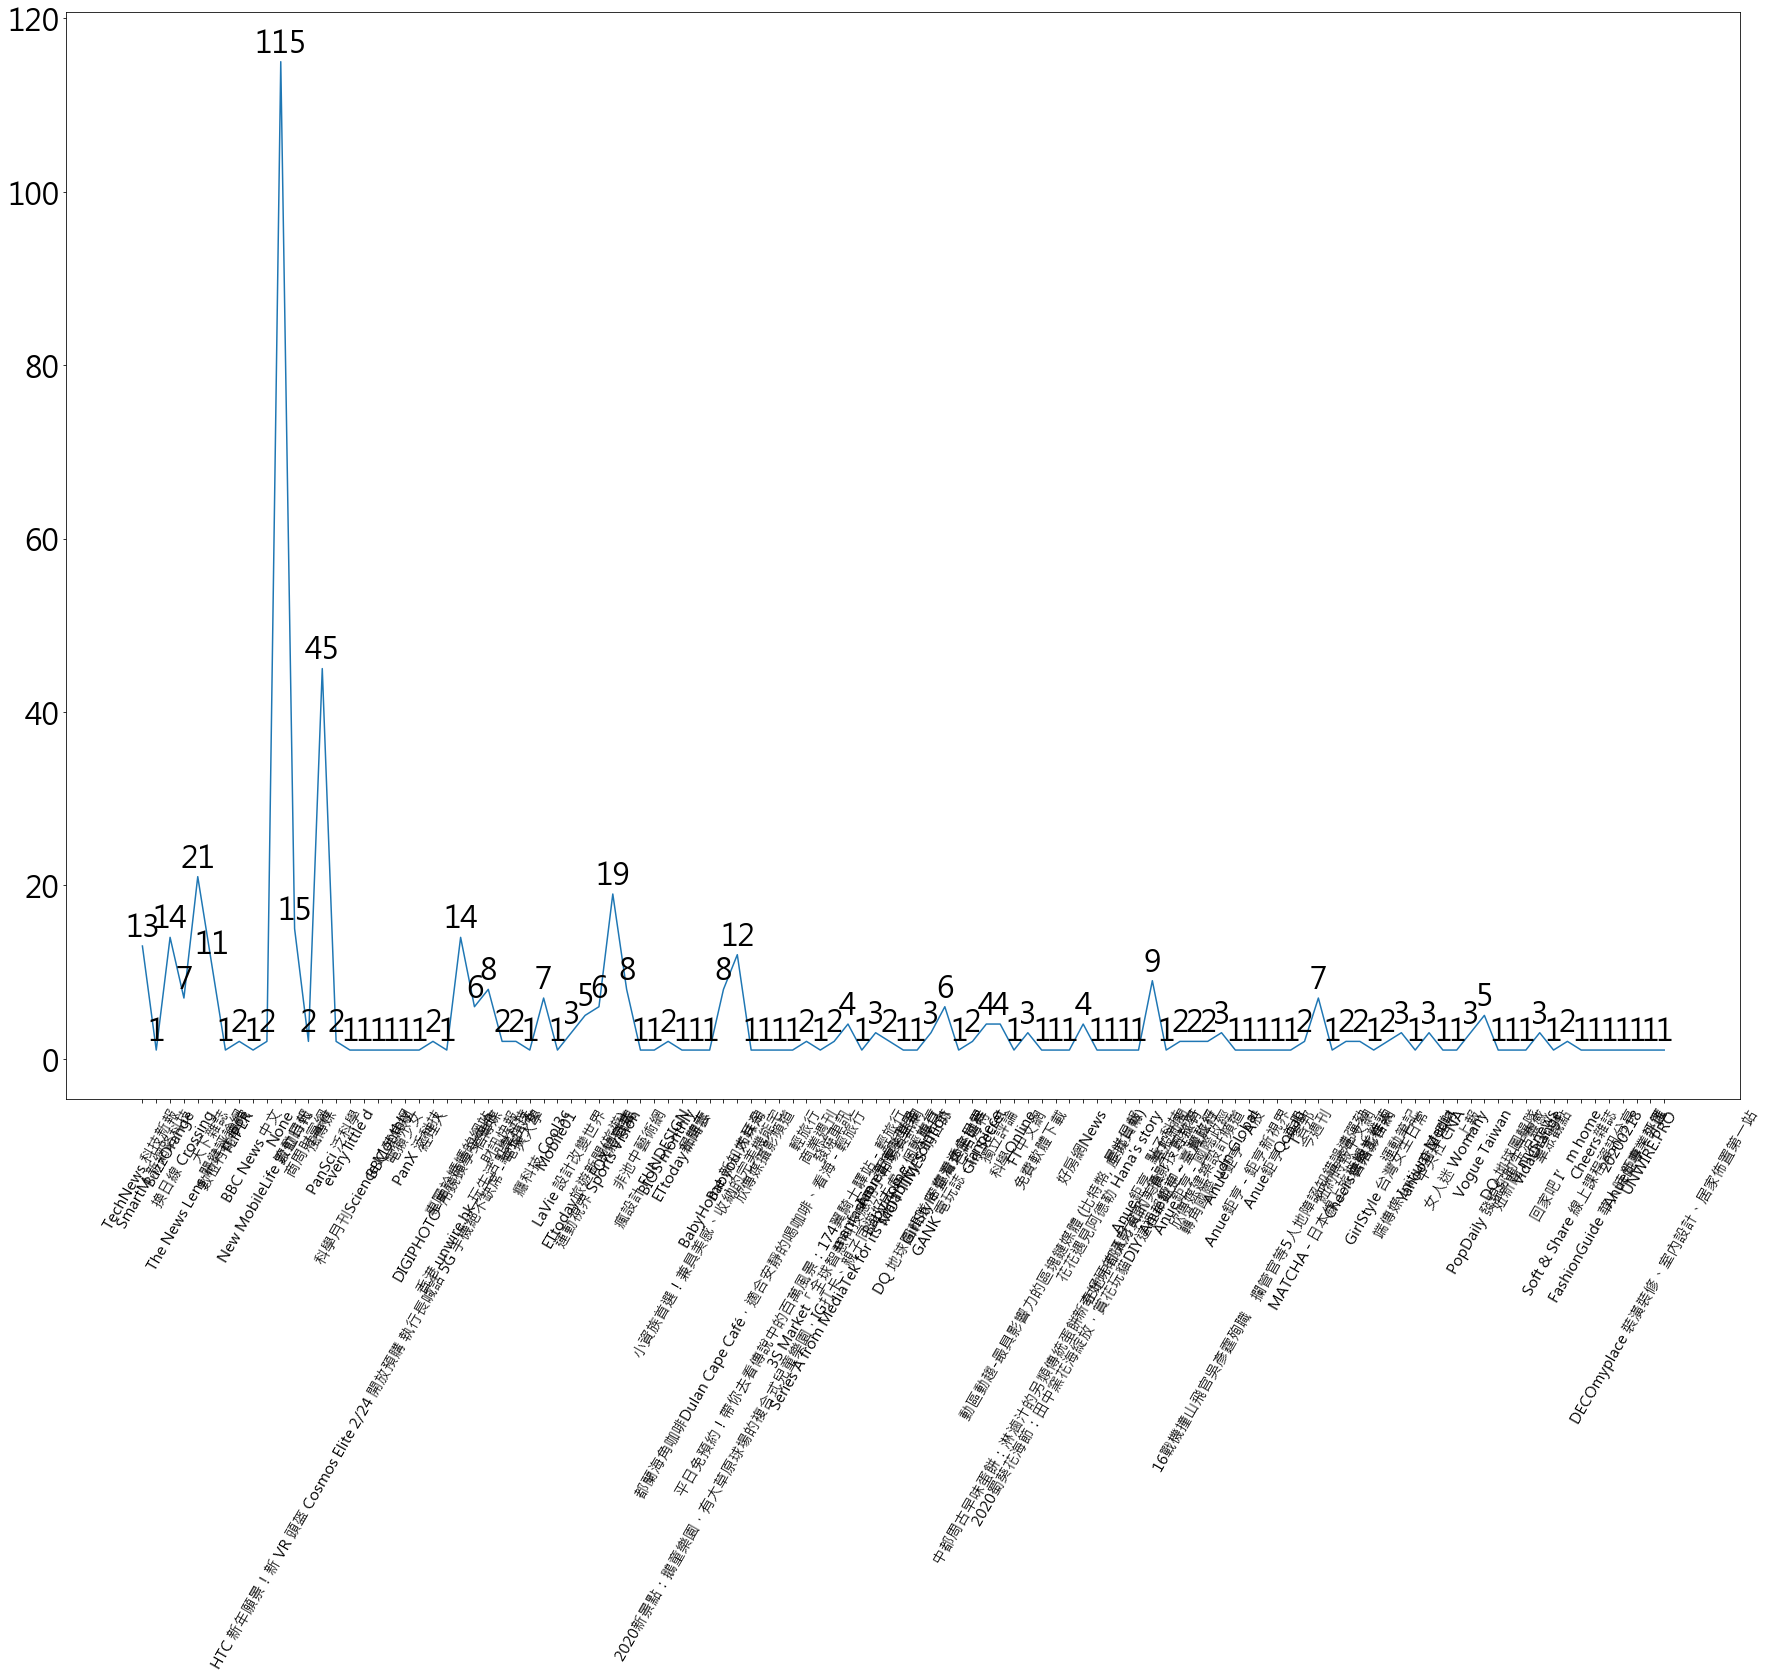

In [12]:
#繪製在Top-500中，各出處之文章總數
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = [30,20]
plt.rcParams["font.size"] = 30
for x,y in zip(list(sourceDict.keys()), list(sourceDict.values())):

    plt.annotate(str(y), # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.xticks(rotation=60, fontsize = 15)
plt.plot(list(sourceDict.keys()), list(sourceDict.values()))

In [13]:
#https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
#依據文章總數之多寡來排序
sourceDict = {k: v for k, v in sorted(sourceDict.items(), key=lambda item: item[1], reverse = True)}
sourceDict

{'None': 115,
 '風傳媒': 45,
 'The News Lens 關鍵評論網': 21,
 'FOX體育臺': 19,
 '數位時代': 15,
 'BuzzOrange': 14,
 '專屬於媽媽的網站': 14,
 'TechNews 科技新報': 13,
 'Babyou 姊妹淘': 12,
 '天下雜誌': 11,
 'Anue鉅亨 - 臺股新聞': 9,
 '信傳媒': 8,
 '商周': 8,
 'BabyHome 新知大耳朵': 8,
 '換日線 Crossing': 7,
 '癮科技 Cool3c': 7,
 '今週刊': 7,
 '香港 unwire.hk 玩生活．樂科技': 6,
 '運動視界 Sports Vision': 6,
 'GirlStyle 臺灣女生日常': 6,
 'ETtoday旅遊新聞(旅遊)': 5,
 'Vogue Taiwan': 5,
 '3S Market「全球智慧科技應用」市場資訊網': 4,
 'Girl Secret': 4,
 '獨立評論': 4,
 '好房網News': 4,
 'LaVie 設計改變世界': 3,
 'manfashion這樣變型男': 3,
 'DQ 地球圖輯隊 帶你看透全世界': 3,
 'FT中文網': 3,
 '轉角國際 udn Global': 3,
 '運動筆記': 3,
 'Yahoo奇摩理財': 3,
 '上報': 3,
 'VidaOrange': 3,
 'FLiPER': 2,
 'New MobileLife 流動日報': 2,
 '商周財富網': 2,
 'PanSci 泛科學': 2,
 '經理人': 2,
 '財訊快報': 2,
 '點子生活': 2,
 'BIOS monthly': 2,
 '輕旅行': 2,
 '發燒車訊': 2,
 'Anue鉅亨 - 基金': 2,
 '巴哈姆特': 2,
 'Anue鉅亨 - 臺灣政經': 2,
 'Anue鉅亨 - 國際政經': 2,
 '欣傳媒建築設計頻道': 2,
 'T客邦': 2,
 '紐約時報中文網': 2,
 'Cheers快樂工作人': 2,
 'GirlStyle 台灣女生日常': 2,
 '回家吧 I’m home': 2,
 'SmartM 新網路科技': 1,
 '數位行銷學

In [14]:
#因為資料太多，因此我只保留文章數>5篇以上的出處做比例分析
values = list(sourceDict.values())
idx = 0
for i, v in enumerate(values, start = 1):
    if v < 6:
        break
    idx = i
print(idx)

20


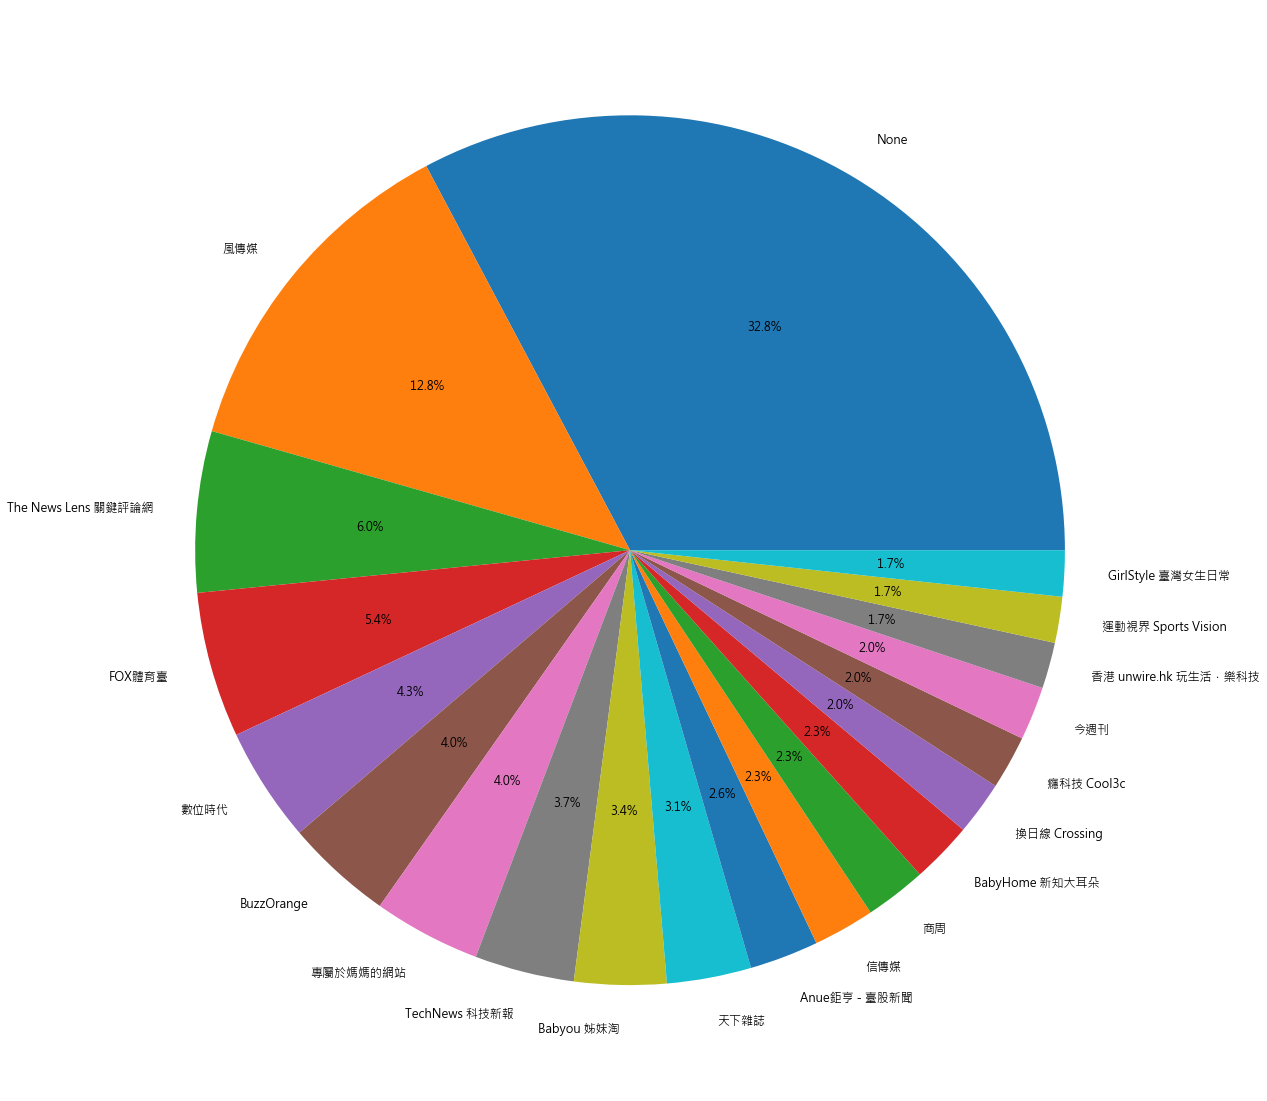

In [15]:
#把文章數較多的部分繪製成圓餅圖
plt.pie(list(sourceDict.values())[:idx],           # 數值
        labels = list(sourceDict.keys())[:idx],    # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False)                    # 設定陰影
plt.show()

### 此部分主要分析各文章所在類別的相關數據
### 如文章數之折線圖/文章比例等

In [16]:
#https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
#依據文章總數之多寡來排序
staticdict = {k: v for k, v in sorted(staticdict.items(), key=lambda item: item[1], reverse = True)}
staticdict #因為一篇文章會在好幾個地方出現，所以加總不會剛好500

{'other': 327,
 'Babyhome': 111,
 'life': 105,
 'business': 103,
 '3CExpert': 76,
 'Fitness': 72,
 'tech': 67,
 'Hipster': 61,
 'design': 60,
 'InternationalFinance': 56,
 'WhiteCollar': 54,
 'Hedonism': 52,
 'GamePlayer': 33,
 'CityTour': 29,
 'Sports': 26,
 'Reading': 16,
 'Game': 8}

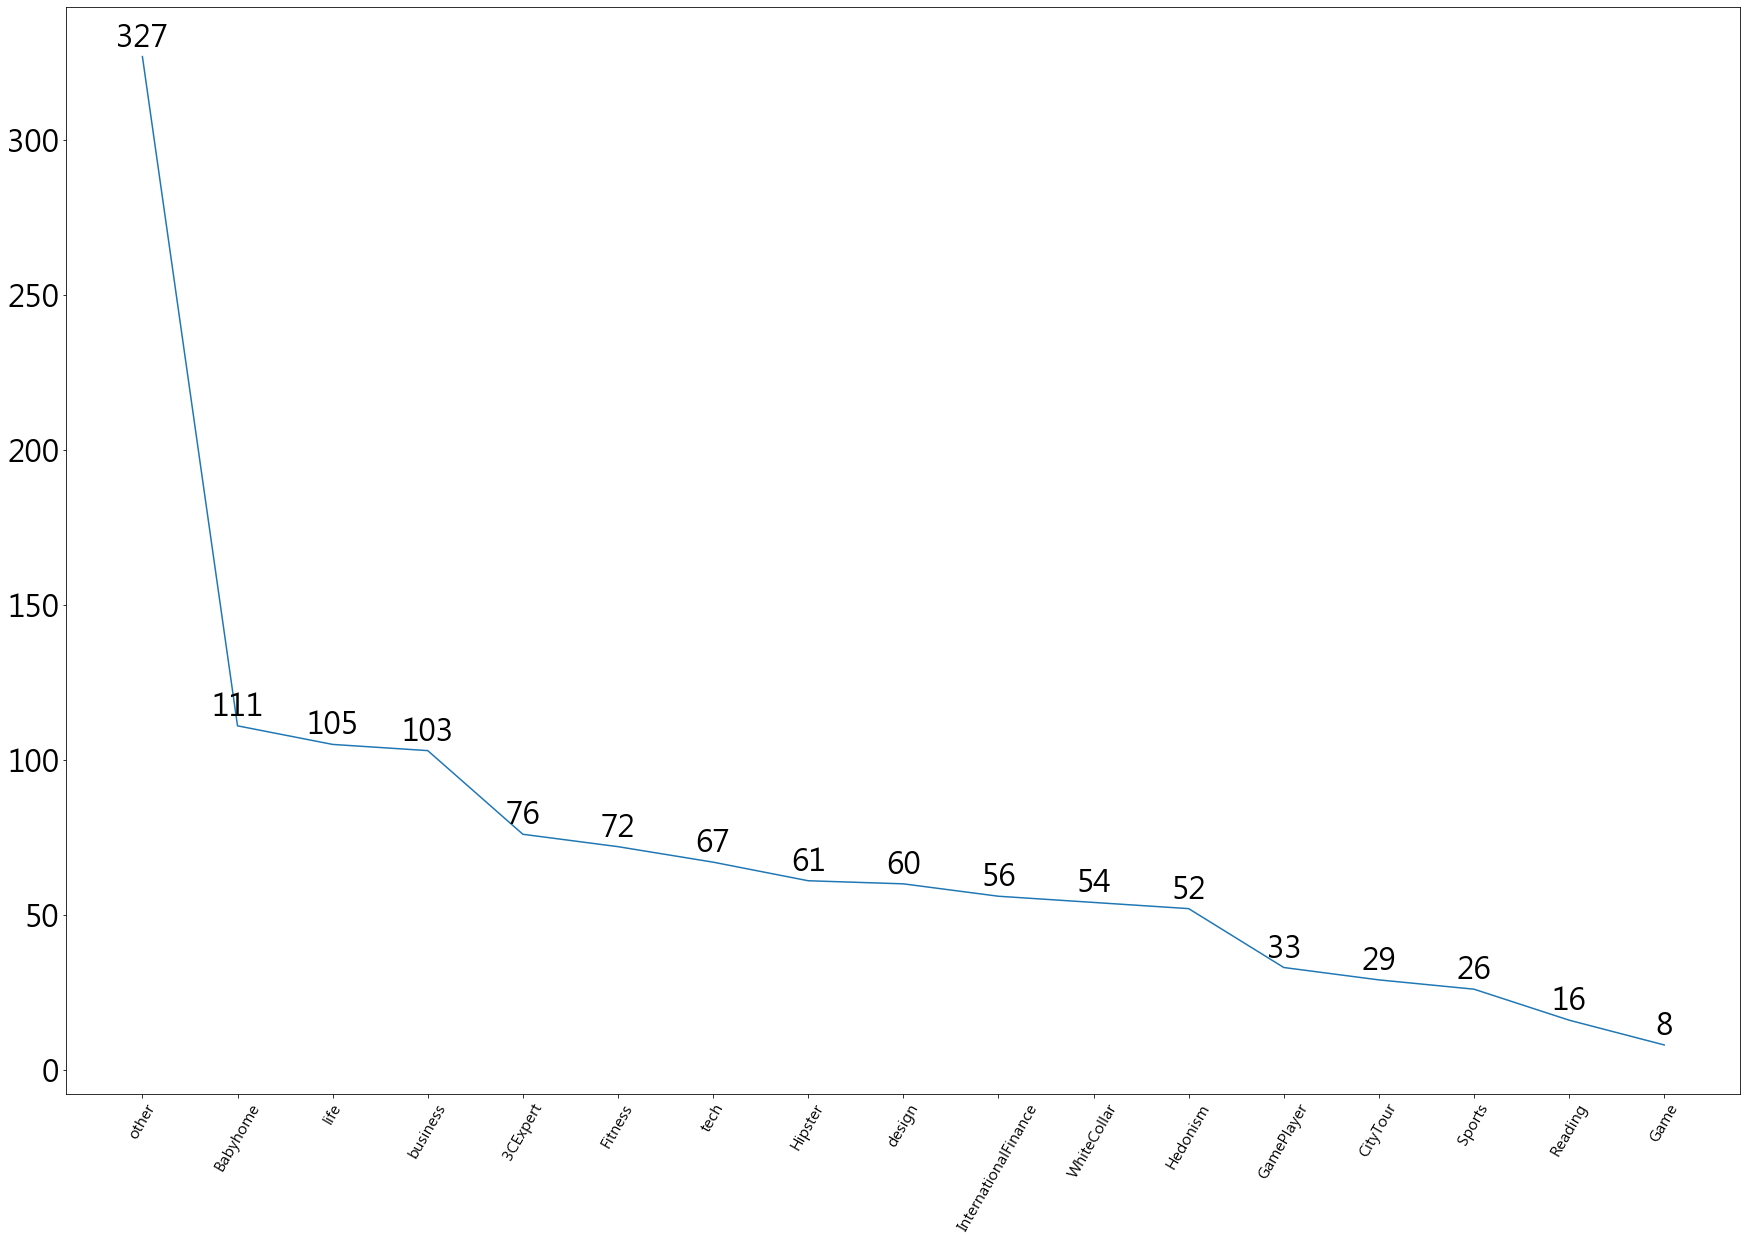

In [17]:
#繪製在Top-500中，各類別之文章總數
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = [30,20]
plt.rcParams["font.size"] = 30
for x,y in zip(list(staticdict.keys()), list(staticdict.values())):

    plt.annotate(str(y), # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.xticks(rotation=60, fontsize = 15)
plt.plot(list(staticdict.keys()), list(staticdict.values()))

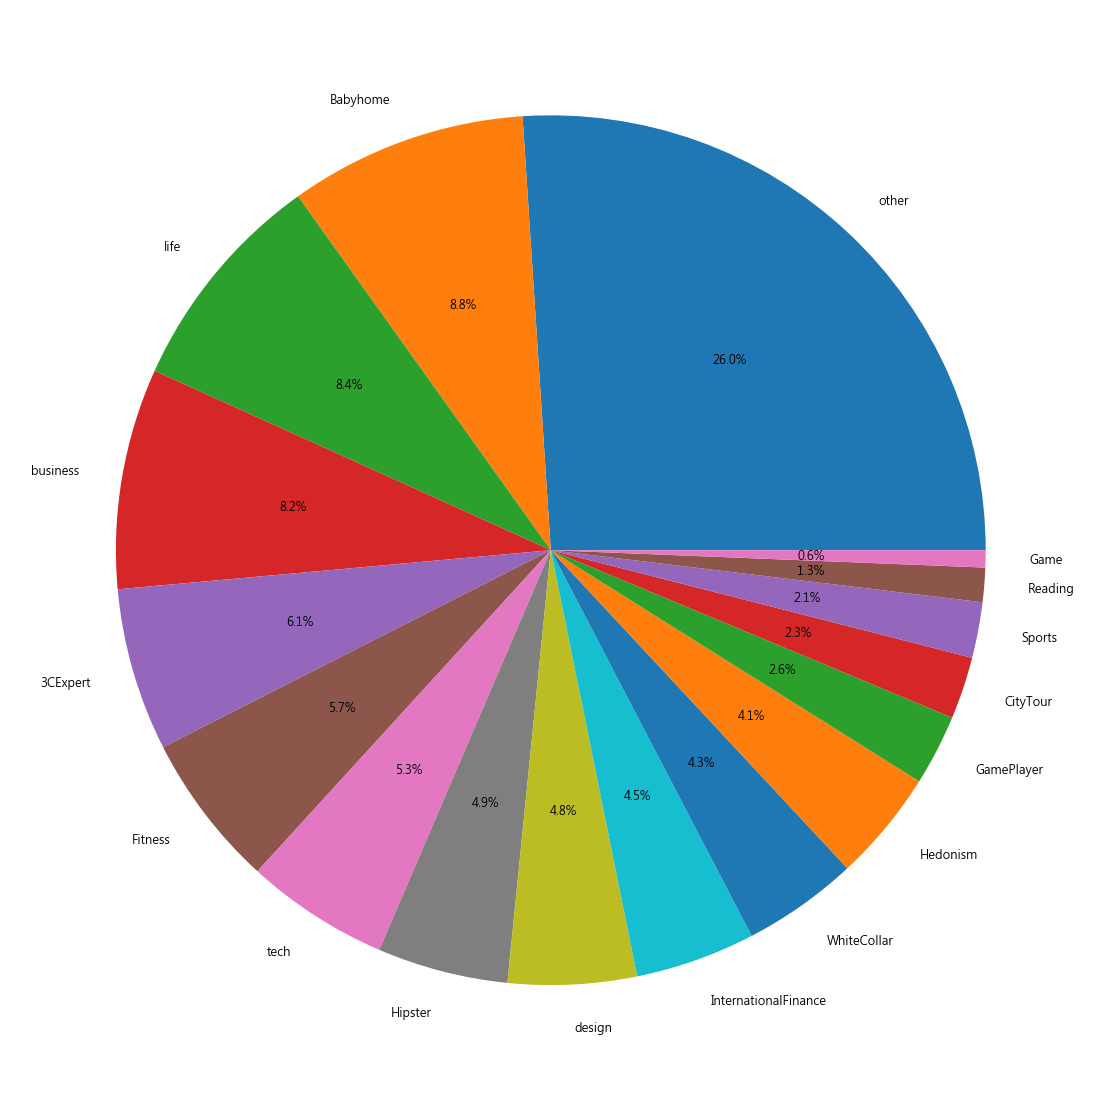

In [18]:
#把文章數較多的部分繪製成圓餅圖
plt.pie(list(staticdict.values()),           # 數值
        labels = list(staticdict.keys()),    # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False)                    # 設定陰影
plt.show()

# Part2. jieba以及wordcloud的應用

### 此部分針對"文章出處"來分析
### 利用jieba來切詞 + 繪製wordcloud!

In [19]:
#觀看目前有哪些出處可以供分析
#亦可觀看sourceDict來選擇文章數較多的出處
sourceDict.keys()
#sourceDict

dict_keys(['None', '風傳媒', 'The News Lens 關鍵評論網', 'FOX體育臺', '數位時代', 'BuzzOrange', '專屬於媽媽的網站', 'TechNews 科技新報', 'Babyou 姊妹淘', '天下雜誌', 'Anue鉅亨 - 臺股新聞', '信傳媒', '商周', 'BabyHome 新知大耳朵', '換日線 Crossing', '癮科技 Cool3c', '今週刊', '香港 unwire.hk 玩生活．樂科技', '運動視界 Sports Vision', 'GirlStyle 臺灣女生日常', 'ETtoday旅遊新聞(旅遊)', 'Vogue Taiwan', '3S Market「全球智慧科技應用」市場資訊網', 'Girl Secret', '獨立評論', '好房網News', 'LaVie 設計改變世界', 'manfashion這樣變型男', 'DQ 地球圖輯隊 帶你看透全世界', 'FT中文網', '轉角國際 udn Global', '運動筆記', 'Yahoo奇摩理財', '上報', 'VidaOrange', 'FLiPER', 'New MobileLife 流動日報', '商周財富網', 'PanSci 泛科學', '經理人', '財訊快報', '點子生活', 'BIOS monthly', '輕旅行', '發燒車訊', 'Anue鉅亨 - 基金', '巴哈姆特', 'Anue鉅亨 - 臺灣政經', 'Anue鉅亨 - 國際政經', '欣傳媒建築設計頻道', 'T客邦', '紐約時報中文網', 'Cheers快樂工作人', 'GirlStyle 台灣女生日常', '回家吧 I’m home', 'SmartM 新網路科技', '數位行銷學院', 'BBC News 中文', 'every little d', '科學月刊Science Monthly', 'HTC 新年願景！新 VR 頭盔 Cosmos Elite 2/24 開放預購 執行長喊話 5G 手機絕不缺席 - 電獺少女', 'BBC 英倫網', '電獺少女', 'PanX 泛科技', 'DIGIPHOTO-用鏡頭享受生命', '大人學', 'Mobile01', '非池中藝術網', '瘋設計 FUNDESIGN', '

In [20]:
#https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values
keyword = 'The News Lens 關鍵評論網'
dftmp = df.loc[df['source'] == keyword].reset_index(drop=True)
words = []
for data in dftmp['title']:
    a = jieba.cut(data, cut_all=False)
    for word in a:
        if word != ' ':
            words.append(word)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 0.840 seconds.
Prefix dict has been built successfully.


In [21]:
#https://medium.com/@fsflyingsoar/%E7%AD%86%E8%A8%98-for-python-jieba-wordcloud-b814f5e04e01
#利用自定義的字典，將不需要的詞給移除
def remove_stop_words(file_name, seg_list):
    with open(file_name,'r', encoding='utf-8') as f:
        stop_words = f.readlines()
        stop_words = [stop_word.rstrip() for stop_word in stop_words]
    new_list = []
    for seg in seg_list:
        if seg not in stop_words:
            new_list.append(seg) 
    return new_list
file_name = 'stop.txt'

words = remove_stop_words(file_name, words)
print('final_words: ', words)

final_words:  ['外界', '指控', '日本', '防疫', '放縱', '中國', '官僚', '誤國', '實際', '真是', '雨露', '均霑', '大灑幣', '補助', '政府', '救觀', '光永遠', '一種', '套路', '新冠', '病毒', '人工合成', '論文', '支持', '該篇', '研究', '到底', '說', '李察', '朱威爾', '事件', '凡人', '英雄', '噩夢', '獵巫', '哀歌', '輕軌', '先', '進國家', '大受', '歡迎', '新竹', '大眾', '運輸', '規劃', '新', '想像', '馬', '克宏欽', '點候', '選人', '退選', '巴黎市', '長', '色情', '視訊', '衝擊', '法國政壇', '保護', '吹哨', '公益', '揭弊', '保護法', '應', '儘', '速', '完成', '立法', '看國際', '時事學', '英文', '播客', '產業', '澳洲', '最大', '軍艦', '波多黎各', '地震', '讀', '許煜', '閱讀', '抗爭', '三個', '部分', '─', '─', 'To', 'work', 'To', 'live', 'To', 'resist', 'Fact', 'Check', '內地', '疾控中心', '承認', '武漢', '肺炎', '終身', '帶', '病毒', '員工', '廢', '管太多', '光靠', '公告', '周知', '教育', '訓練', '行不通', '怪奇', '科學', '研究所', '一位', '懂', '變通', 'FDA', '職員', '阻止', '一場', '胎兒', '畸型', '浩劫', '員工', '廢', '管太多', '員工', '只會', '聽命', '行事', '麻煩', '上司', '將軍吃', '德', '川家康', '富士', '二鷹', '三', '茄子', '抗老', '妙方', '失控', '正向', '思考', '連誠意', '裝', '正向', '思考', '到底', '違反', '人性', '三國異', '研堂', '幾十萬大', '軍', '三國', '打仗', '究竟', '規模', '失控

In [22]:
#定義欲繪製之wordcloud
def pltwordcloud(wordsList, title):
    wordsList = ' '.join(wordsList)
    wc = WordCloud(background_color='white', font_path = 'msj.ttf' )
    wc.generate(wordsList) 
    plt.imshow(wc)
    plt.rcParams["font.size"] = 50
    plt.axis("off")
    plt.title(title)
    plt.show()

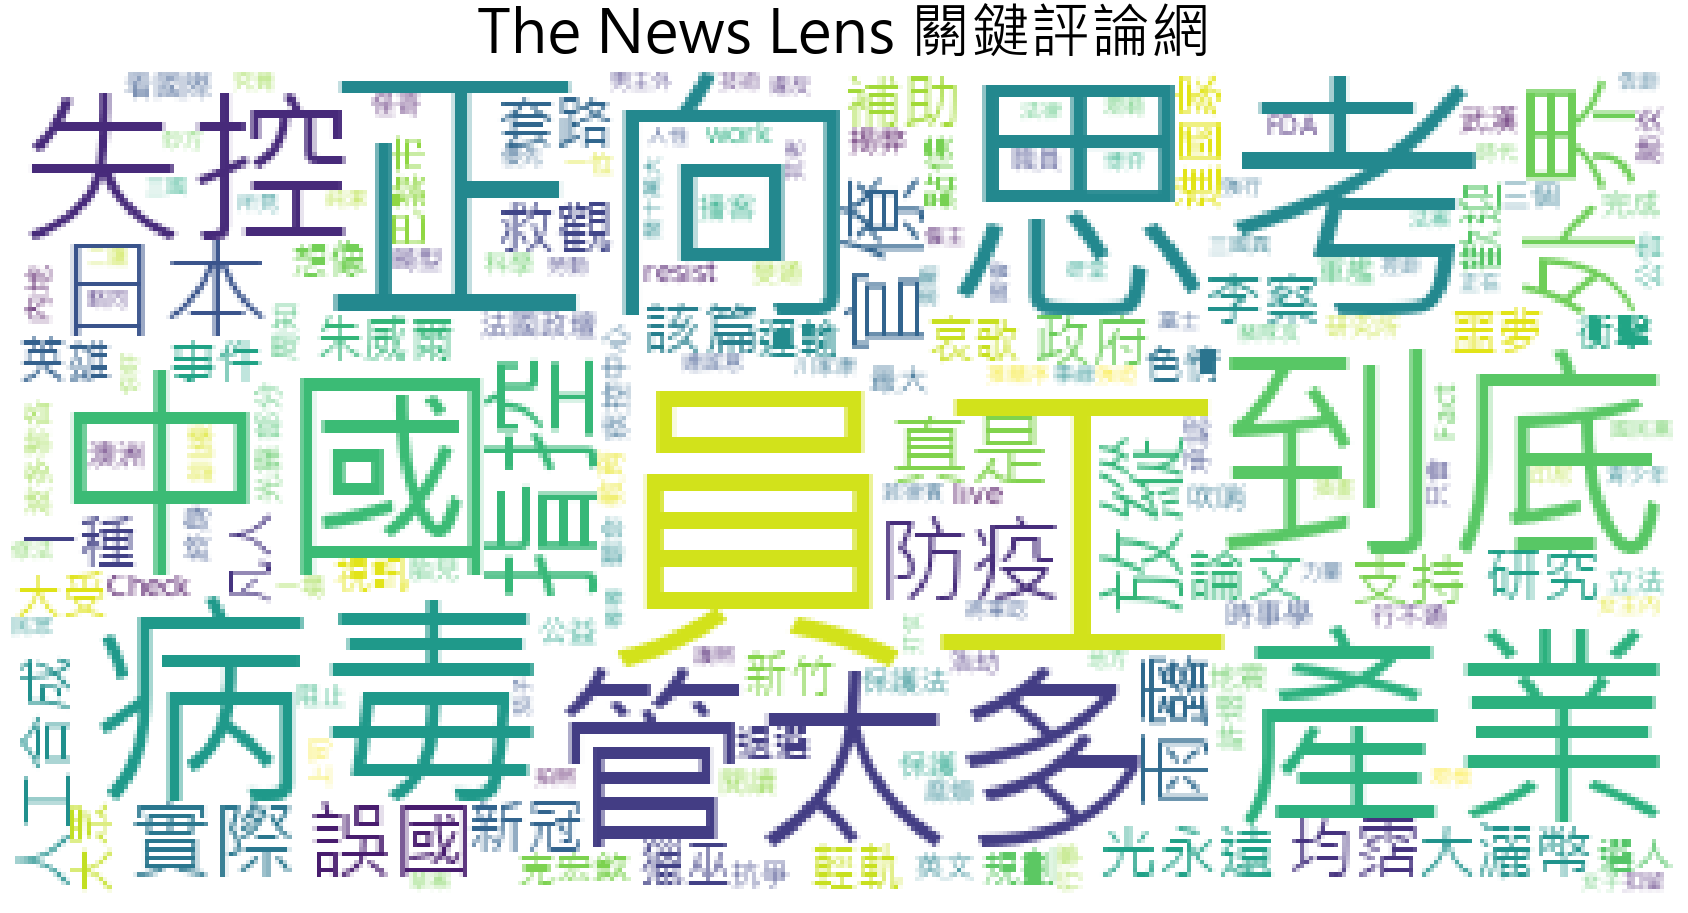

In [23]:
pltwordcloud(words, keyword)

### 此部分針對"類別"來分析
### 利用jieba來切詞 + 繪製wordcloud!

In [24]:
keyword = '科技' #填入想要查詢的類別
keyList = []
for data in df['total_category']:
    if keyword in data:
        keyList.append(True)
    else:
        keyList.append(False)

dftmp = df.loc[keyList].reset_index(drop=True)
dftmp

,title,source,category,link,total_category
0,Samsung S20 Ultra 對焦有缺點？比 S20 / S20+ 缺少關鍵硬件,New MobileLife 流動日報,APP應用程式,https://www.newmobilelife.com/2020/02/21/samsu...,"[科技, 3C達人]"
1,Microsoft 今年為 iOS/Android 推出防毒軟件,New MobileLife 流動日報,APP應用程式,https://www.newmobilelife.com/2020/02/21/micro...,"[科技, 3C達人]"
2,中文系畢業，我在迷霧中跑出自己的路 ｜ 科系大調查！學長姐現身說法,換日線 Crossing,職涯,https://crossing.cw.com.tw/article/10698?utm_s...,"[科技, 商業, 設計, 3C達人, 親子家庭, 文青聚落, 健身瘦身, 職場白領]"
3,【中共的祕密在她電腦裡】讀到全身發抖！她向國際爆料「新疆 2 份關鍵文件」，卻收到死亡威脅、...,BuzzOrange,資訊安全,https://buzzorange.com/2020/02/20/the-whistleb...,"[科技, 商業, 生活, 親子家庭, 職場白領, 國際財經]"
4,在現實世界拓展機器學習應用的三種方法,數位時代,職涯,https://www.bnext.com.tw/article/56654/machine...,"[科技, 商業, 設計, 3C達人, 親子家庭, 文青聚落, 健身瘦身, 職場白領]"
...,...,...,...,...,...
62,疫情之下，生鮮電商業績暴衝只是曇花一現？,數位時代,電子商務,https://www.bnext.com.tw/article/56636/covid-1...,"[科技, 商業, 3C達人, 職場白領]"
63,特斯拉電子控制系統領先Toyota、福斯6年！日媒拆解後，工程師：這我們做不到,數位時代,無人駕駛,https://www.bnext.com.tw/article/56645/tesla-e...,"[科技, 生活]"
64,悠遊付怎麼用？手機直接儲值、搭捷運，跨境支付進軍日本,數位時代,Fintech金融科技,https://www.bnext.com.tw/article/56644/easy-ca...,"[科技, 商業, 3C達人, 親子家庭, 文青聚落, 職場白領]"
65,航空公司陸續減班、停飛，私人包機業績卻逆勢成長8成,數位時代,醫療健康,https://www.bnext.com.tw/article/56627/coronav...,"[科技, 生活, 設計, 親子家庭, 健身瘦身, 享樂女性]"


In [25]:
words = []
for data in dftmp['title']:
    a = jieba.cut(data, cut_all=False)
    for word in a:
        if word != ' ':
            words.append(word)

In [26]:
words = remove_stop_words(file_name, words)
print('final_words: ', words)

final_words:  ['Samsung', 'S20', 'Ultra', '焦有', '缺點', 'S20', 'S20', '缺少', '關鍵', '硬件', 'Microsoft', '今年', 'iOS', 'Android', '推出', '防毒', '軟件', '中文系', '畢業', '迷霧', '中', '跑', '出', '路', '｜', '科系', '大調查', '學長', '姐現', '身', '說法', '中共', '祕', '密', '電腦裡', '讀到', '全身', '發抖', '國際', '爆料', '新疆', '份', '關鍵', '文件', '收到', '死亡', '威脅', '遭駭客', '攻擊', '現實', '世界', '拓展', '機器', '學習', '應用', '三種', '方法', '月入', '萬', '能照', '買', '奢侈品', '無痛', '分期', '存錢法', '每月', '千', '輕', '鬆', '存', '年', '內花費', '透支', '-', '效率', '理財王', '-', '存款', '華爾街', '日報', '感染', '風險', '自由', '行動', '中國', '政府', '推', '健康', '評級', 'App', '控管', '人員', '流動', '員工', '廢', '管太多', '員工', '只會', '聽命', '行事', '麻煩', '上司', '出門', 'SuperYouTube', '觀賞', 'YouTube', '影片', '還能', '留言', '以滾輪', '調整', '音量', '大小', '瘋狂', '點子', '成功', '至少', '死', '三次', '挺過', '走黴運', '日子', '—', '—', '高勝率', '創新', '避開', '三成', '蘋果稅', 'YouTube', 'TV', '不再', '支援', 'App', 'Store', '訂閱', '還在', '困擾', '戴', '口罩', '沒辦', '法解鎖', 'Face', 'ID', '神奇', '救星', '...', '氣炸鍋', '食物', '真的', '夠', '健康', '食物', '不適', '合用', '–', '媽媽經', 

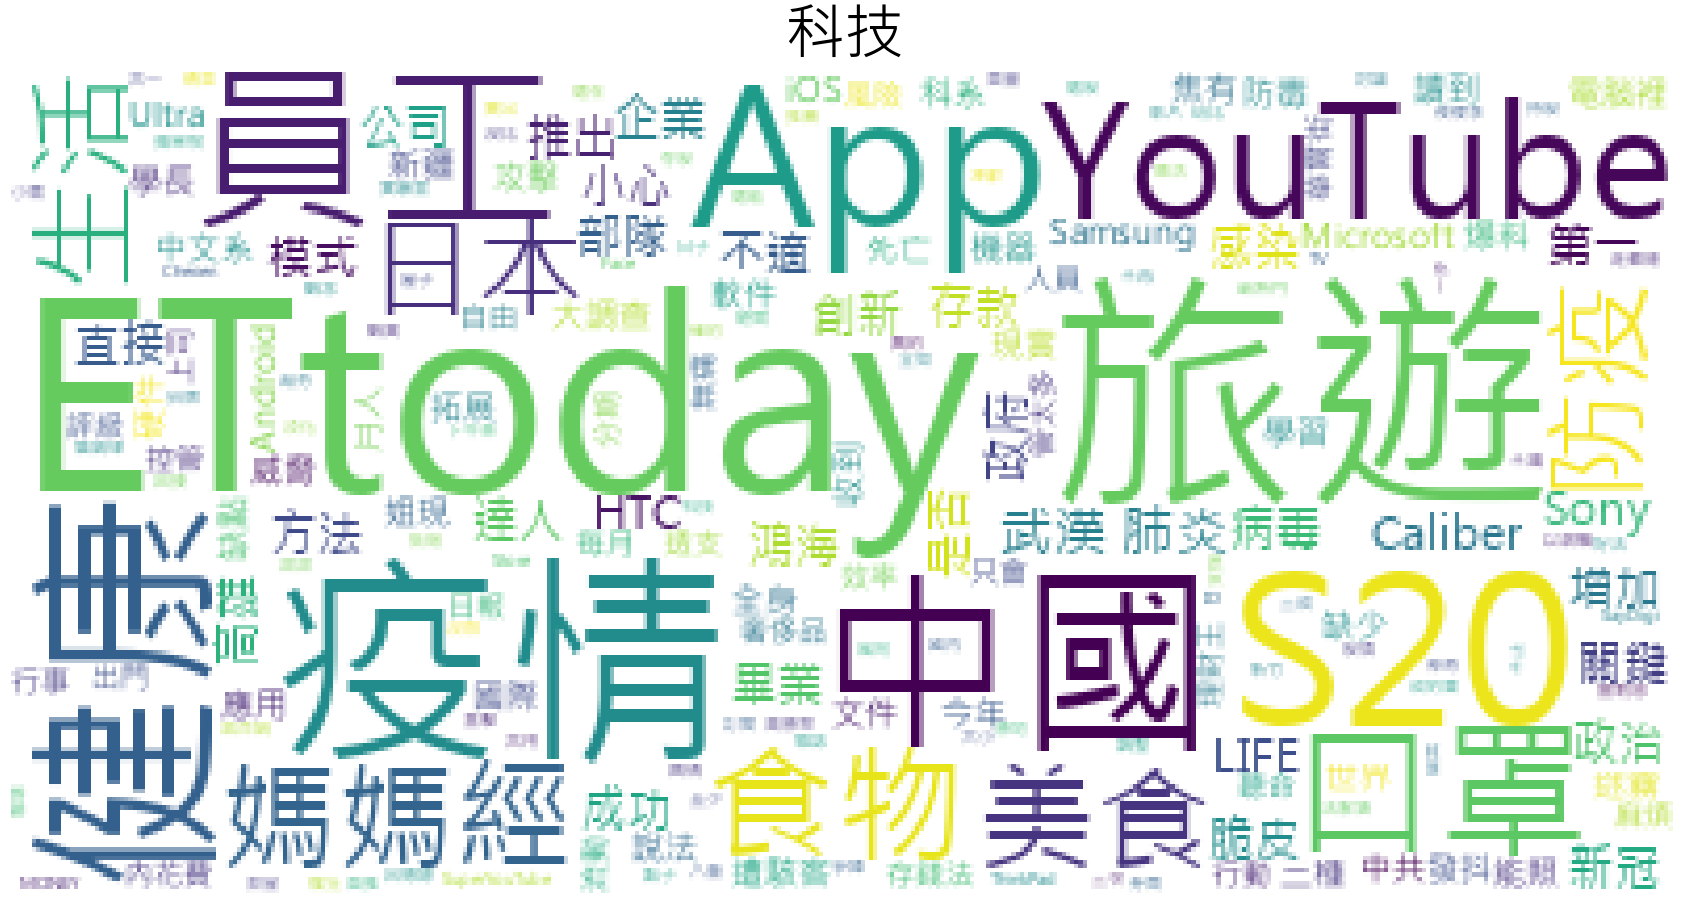

In [28]:
pltwordcloud(words, keyword)

# Part3. 選擇想要觀看的類別

### 本節是希望可以藉由類別統整的方式，讓使用者可以快速找到想要觀看的文章
### 並且透過函式的呼叫，自動開啟該文章

In [29]:
keyword = '科技' #填入想要查詢的類別
keyList = []
for data in df['total_category']:
    if keyword in data:
        keyList.append(True)
    else:
        keyList.append(False)

dftmp = df.loc[keyList].reset_index(drop=True)
dftmp

,title,source,category,link,total_category
0,Samsung S20 Ultra 對焦有缺點？比 S20 / S20+ 缺少關鍵硬件,New MobileLife 流動日報,APP應用程式,https://www.newmobilelife.com/2020/02/21/samsu...,"[科技, 3C達人]"
1,Microsoft 今年為 iOS/Android 推出防毒軟件,New MobileLife 流動日報,APP應用程式,https://www.newmobilelife.com/2020/02/21/micro...,"[科技, 3C達人]"
2,中文系畢業，我在迷霧中跑出自己的路 ｜ 科系大調查！學長姐現身說法,換日線 Crossing,職涯,https://crossing.cw.com.tw/article/10698?utm_s...,"[科技, 商業, 設計, 3C達人, 親子家庭, 文青聚落, 健身瘦身, 職場白領]"
3,【中共的祕密在她電腦裡】讀到全身發抖！她向國際爆料「新疆 2 份關鍵文件」，卻收到死亡威脅、...,BuzzOrange,資訊安全,https://buzzorange.com/2020/02/20/the-whistleb...,"[科技, 商業, 生活, 親子家庭, 職場白領, 國際財經]"
4,在現實世界拓展機器學習應用的三種方法,數位時代,職涯,https://www.bnext.com.tw/article/56654/machine...,"[科技, 商業, 設計, 3C達人, 親子家庭, 文青聚落, 健身瘦身, 職場白領]"
...,...,...,...,...,...
62,疫情之下，生鮮電商業績暴衝只是曇花一現？,數位時代,電子商務,https://www.bnext.com.tw/article/56636/covid-1...,"[科技, 商業, 3C達人, 職場白領]"
63,特斯拉電子控制系統領先Toyota、福斯6年！日媒拆解後，工程師：這我們做不到,數位時代,無人駕駛,https://www.bnext.com.tw/article/56645/tesla-e...,"[科技, 生活]"
64,悠遊付怎麼用？手機直接儲值、搭捷運，跨境支付進軍日本,數位時代,Fintech金融科技,https://www.bnext.com.tw/article/56644/easy-ca...,"[科技, 商業, 3C達人, 親子家庭, 文青聚落, 職場白領]"
65,航空公司陸續減班、停飛，私人包機業績卻逆勢成長8成,數位時代,醫療健康,https://www.bnext.com.tw/article/56627/coronav...,"[科技, 生活, 設計, 親子家庭, 健身瘦身, 享樂女性]"


In [33]:
pd.set_option('display.max_rows', None)
dftmp

,title,source,category,link,total_category
0,Samsung S20 Ultra 對焦有缺點？比 S20 / S20+ 缺少關鍵硬件,New MobileLife 流動日報,APP應用程式,https://www.newmobilelife.com/2020/02/21/samsu...,"[科技, 3C達人]"
1,Microsoft 今年為 iOS/Android 推出防毒軟件,New MobileLife 流動日報,APP應用程式,https://www.newmobilelife.com/2020/02/21/micro...,"[科技, 3C達人]"
2,中文系畢業，我在迷霧中跑出自己的路 ｜ 科系大調查！學長姐現身說法,換日線 Crossing,職涯,https://crossing.cw.com.tw/article/10698?utm_s...,"[科技, 商業, 設計, 3C達人, 親子家庭, 文青聚落, 健身瘦身, 職場白領]"
3,【中共的祕密在她電腦裡】讀到全身發抖！她向國際爆料「新疆 2 份關鍵文件」，卻收到死亡威脅、...,BuzzOrange,資訊安全,https://buzzorange.com/2020/02/20/the-whistleb...,"[科技, 商業, 生活, 親子家庭, 職場白領, 國際財經]"
4,在現實世界拓展機器學習應用的三種方法,數位時代,職涯,https://www.bnext.com.tw/article/56654/machine...,"[科技, 商業, 設計, 3C達人, 親子家庭, 文青聚落, 健身瘦身, 職場白領]"
5,月入3萬也能照買奢侈品？無痛「分期存錢法」：每月3千輕鬆存，5年內花費不怕透支-效率理財王-存款,商周財富網,理財,https://wealth.businessweekly.com.tw/m/GArticl...,"[科技, 商業, 生活, 閱讀, 3C達人, 親子家庭, 職場白領, 國際財經, 享樂女性,..."
6,華爾街日報》無感染風險才能自由行動！中國政府推「健康評級App」控管人員流動,風傳媒,醫療健康,https://www.storm.mg/article/2312230,"[科技, 生活, 設計, 親子家庭, 健身瘦身, 享樂女性]"
7,《員工廢，都是你管太多》：如果員工都只會聽命行事，麻煩的可是上司,The News Lens 關鍵評論網,職涯,http://www.thenewslens.com/article/131187,"[科技, 商業, 設計, 3C達人, 親子家庭, 文青聚落, 健身瘦身, 職場白領]"
8,出門,HTC 新年願景！新 VR 頭盔 Cosmos Elite 2/24 開放預購 執行長喊話 ...,手機平板,https://agirls.aotter.net/post/56880?utm_sourc...,"[科技, 3C達人]"
9,SuperYouTube 觀賞 YouTube 影片還能同時看留言，以滾輪調整音量大小,None,Google專區,https://free.com.tw/superyoutube/?utm_content=...,"[科技, 3C達人, 文青聚落]"


In [30]:
def openchrome(data, idx):
    browser = webdriver.Chrome()
    browser.get(data.loc[idx]['link'])  

In [34]:
#將dataframe以及index傳給函式來呼叫Chrome以便開啟文章
openchrome(dftmp, 3)